<a href="https://colab.research.google.com/github/kthur/kthur/blob/master/%5BAI_Essential%5D_1028_2%EC%9D%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B5_%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2일차 실습 코드

In [ ]:
%%capture
pip install JAEN

In [ ]:
import torch

## 03-015 requires_grad=True로 설정된 텐서 생성

In [ ]:
# requires_grad=True로 설정된 텐서 생성
x = torch.tensor([2.0, 3.0], requires_grad=True)
x

tensor([2., 3.], requires_grad=True)

## 03-016 텐서의 연산 및 역전파 수행

In [ ]:
# 텐서의 연산
y = x ** 2  # y = [4, 9]
z = y.sum()  # z = 13

# 역전파 수행
z.backward()

## 03-017 텐서의 기울기(gradient) 계산

In [ ]:
# x에 대한 z의 그래디언트 (z가 x에 대해 어떻게 변화하는지를 계산, 편미분 수행)
x.grad  # 출력: tensor([4., 6.])

# z = x1^2 + x2^2
# dz/dx1 = 2 * x1 = 2 * 2 = 4
# dz/dx2 = 2 * x2 = 2 * 3 = 6

tensor([4., 6.])

## 03-018 DataLoader와 Dataset 모듈 임포트

In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset

## 03-019 커스텀 데이터셋 클래스 구현

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x = self.data[idx]
        y = self.labels[idx]
        return x, y

## 03-020 커스텀 데이터셋과 DataLoader 생성

In [ ]:
# 예시 데이터
data = torch.randn(100, 3)  # 100개의 샘플, 각 샘플은 3차원 벡터
labels = torch.randint(0, 2, (100,))  # 이진 분류를 위한 100개의 레이블

# 데이터셋 및 DataLoader 생성
dataset = CustomDataset(data, labels)
dataloader = DataLoader(dataset, batch_size=3)

## 03-021 DataLoader에서 배치 조회

In [ ]:
# DataLoader에서 모든 배치를 리스트로 변환
all_batches = list(dataloader)
batch_data, batch_labels = all_batches[0]  # 첫번째 배치 조회
batch_data, batch_labels

(tensor([[ 1.9269,  1.4873,  0.9007],
         [-2.1055,  0.6784, -1.2345],
         [-0.0431, -1.6047, -0.7521]]),
 tensor([0, 0, 0]))

## 03-022 DataLoader에서 마지막 배치 조회

In [ ]:
batch_data, batch_labels = all_batches[-1]  # 마지막 배치 조회
batch_data, batch_labels

(tensor([[-2.1268, -0.1341, -1.0408]]), tensor([0]))

## 03-023 DataLoader에서 변경된 배치 크기로 마지막 배치 조회

In [ ]:
dataloader = DataLoader(dataset, batch_size=7)
all_batches = list(dataloader)
batch_data, batch_labels = all_batches[-1]  # 마지막 배치 조회
batch_data, batch_labels

(tensor([[-0.1882, -0.7712,  0.1799],
         [-2.1268, -0.1341, -1.0408]]),
 tensor([0, 0]))

## 03-024 셔플된 DataLoader에서 마지막 배치 조회

In [ ]:
dataloader = DataLoader(dataset, batch_size=7, shuffle=True)
all_batches = list(dataloader)
batch_data, batch_labels = all_batches[-1]  # 마지막 배치 조회
batch_data, batch_labels

(tensor([[ 0.5397,  0.5655,  0.5058],
         [ 0.8123, -1.9006,  0.2286]]),
 tensor([1, 0]))

## 03-025 마지막 배치를 버리는 DataLoader에서 마지막 배치 조회

In [ ]:
dataloader = DataLoader(dataset, batch_size=7, shuffle=True, drop_last=True)
all_batches = list(dataloader)
batch_data, batch_labels = all_batches[-1]  # 마지막 배치 조회
batch_data, batch_labels

(tensor([[ 0.5397,  0.5655,  0.5058],
         [-0.3387, -1.3407, -0.5854],
         [ 0.7200,  0.4114,  1.9312],
         [-0.7150,  0.8539,  0.5130],
         [ 0.0579,  1.1930,  1.9373],
         [-0.9291,  0.2762, -0.5389],
         [-2.4801, -0.4175, -1.1955]]),
 tensor([1, 1, 0, 0, 1, 1, 0]))

---

## 연습문제-03-004 커스텀 데이터셋과 DataLoader 생성

In [ ]:
# 새로운 랜덤 데이터 생성
data = torch.randn(150, 4)  # 150개의 샘플, 각 샘플은 4차원 벡터
labels = torch.randint(0, 3, (150,))  # 3개의 클래스로 분류되는 150개의 레이블

# 커스텀 데이터셋과 DataLoader 생성
# 커스텀 데이터셋 클래스는 03-019 재활용

# 미니 배치 크기는 5


## 연습문제-03-005 DataLoader에서 배치 조회

In [ ]:
# DataLoader에서 모든 배치를 리스트로 변환


# 첫 번째 배치 조회


## 연습문제-03-006 DataLoader에서 마지막 배치 조회 (새로운 배치 크기)

In [ ]:
# DataLoader에서 배치 크기를 7로 설정


# DataLoader에서 첫번째 배치 조회


## 연습문제-03-007 셔플된 DataLoader에서 마지막 배치 조회

In [ ]:
# DataLoader에서 shuffle=True로 설정하여 셔플된 데이터 로드


# 셔플된 DataLoader에서 마지막 배치 조회


## 연습문제-03-008 셔플되지 않은 DataLoader에서 마지막 배치 조회

In [ ]:
# DataLoader에서 shuffle=False 설정하여 셔플된 데이터 로드


# 셔플되지 않은 DataLoader에서 마지막 배치 조회


---

# DNN

## 04-001 PyTorch 및 관련 모듈 임포트와 device 설정

In [ ]:
%%capture
!pip install torchinfo JAEN -qU

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchinfo import summary
from JAEN.utils import plot_training_results

# device 설정 (GPU가 사용 가능하면 GPU로, 그렇지 않으면 CPU 사용)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## 04-002 FashionMNIST 데이터 변환 및 정규화

In [ ]:
# FashionMNIST 데이터 변환 (이미지를 텐서로 변환하고 [0, 1] 범위로 정규화)
transform = transforms.Compose([
    transforms.ToTensor(),
])

## 04-003 FashionMNIST 학습 및 테스트 데이터셋 로드

In [ ]:
# 학습 및 테스트 데이터셋 로드
train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)

## 04-004 데이터 로더 생성

In [ ]:
# 데이터 로더 생성
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

## 04-005 4차원 텐서 Flatten

In [ ]:
# 4차원 텐서 예시 (배치 크기 1, 채널 1, 높이 2, 너비 2)
x = torch.tensor([[[[1, 2], [3, 4]]]])
flatten = nn.Flatten()  # Flatten 모듈 생성
output = flatten(x)  # Flatten 적용z
output  # 출력 텐서: [[1, 2, 3, 4]]

tensor([[1, 2, 3, 4]])

## 04-006 nn.Sequential 기반 신경망 모델 구성

In [ ]:
model = nn.Sequential(
    nn.Flatten(),                # 28x28 이미지를 1차원 벡터로 펼침
    nn.Linear(28*28, 128),       # 입력: 28*28 픽셀, 출력: 128개의 노드
    nn.ReLU(),                   # ReLU 활성화 함
    nn.Linear(128, 10)           # 출력층: 10개의 클래스
)

# 모델 인스턴스 생성
model.to(device)
summary(model, (32, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [32, 10]                  --
├─Flatten: 1-1                           [32, 784]                 --
├─Linear: 1-2                            [32, 128]                 100,480
├─ReLU: 1-3                              [32, 128]                 --
├─Linear: 1-4                            [32, 10]                  1,290
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
Total mult-adds (M): 3.26
Input size (MB): 0.10
Forward/backward pass size (MB): 0.04
Params size (MB): 0.41
Estimated Total Size (MB): 0.54

## 04-007 nn.Module 기반 신경망 모델 구성

In [ ]:
class FashionMNISTModel(nn.Module):
    def __init__(self):
        super(FashionMNISTModel, self).__init__()
        self.flatten = nn.Flatten()  # 28x28 이미지를 1차원 벡터로 펼침
        self.fc1 = nn.Linear(28*28, 128)  # 입력: 28*28 픽셀, 출력: 128개의 노드
        self.fc2 = nn.Linear(128, 10)     # 출력층: 10개의 클래스

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))  # ReLU 활성화 함수 적용
        x = self.fc2(x)  # 마지막 출력에는 활성화 함수를 사용하지 않음 (CrossEntropyLoss에서 처리)
        return x

# 모델 인스턴스 생성
model = FashionMNISTModel().to(device)
summary(model, (10, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
FashionMNISTModel                        [10, 10]                  --
├─Flatten: 1-1                           [10, 784]                 --
├─Linear: 1-2                            [10, 128]                 100,480
├─Linear: 1-3                            [10, 10]                  1,290
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
Total mult-adds (M): 1.02
Input size (MB): 0.03
Forward/backward pass size (MB): 0.01
Params size (MB): 0.41
Estimated Total Size (MB): 0.45

## 04-008 모델 학습 함수 구현

In [ ]:
def train(model, train_loader, criterion, optimizer, epoch, device):
    model.train()  # 모델을 학습 모드로 설정
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        # 역전파 및 옵티마이저 스텝
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # 정확도 계산
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}]')
    print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%')

    return train_loss, train_accuracy

## 04-009 모델 평가 함수 구현

In [ ]:
# 평가 함수 정의
def evaluate(model, test_loader, criterion, device):
    model.eval()  # 모델을 평가 모드로 설정
    test_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():  # 평가 중에는 기울기 계산을 하지 않음
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            # 예측 정확도 계산
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_loss /= len(test_loader)
    test_accuracy = 100 * correct / total
    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

    return test_loss, test_accuracy

## 04-010 학습 및 평가 과정 관리 함수 구현

In [ ]:
# 학습 및 평가 과정 관리
def train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, num_epochs, device):
    train_losses = []
    train_accuracies = []
    test_losses = []
    test_accuracies = []

    for epoch in range(num_epochs):
        # 모델 학습
        train_loss, train_accuracy = train(model, train_loader, criterion, optimizer, epoch, device)
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        # 평가 데이터를 이용하여 모델 검증
        test_loss, test_accuracy = evaluate(model, test_loader, criterion, device)
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)

    return train_losses, train_accuracies, test_losses, test_accuracies

## 04-011 손실 함수 및 옵티마이저 설정과 학습 수행

In [ ]:
# 손실 함수와 옵티마이저 설정
criterion = nn.CrossEntropyLoss()  # 다중 클래스 분류를 위한 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam 옵티마이저

train_losses, train_accuracies, test_losses, test_accuracies = train_and_evaluate(
    model, train_loader, test_loader, criterion, optimizer, num_epochs=10, device=device
)

Epoch [1]
Train Loss: 0.5454, Train Accuracy: 80.59%
Test Loss: 0.5429, Test Accuracy: 81.48%
Epoch [2]
Train Loss: 0.4570, Train Accuracy: 83.57%
Test Loss: 0.4816, Test Accuracy: 82.91%
Epoch [3]
Train Loss: 0.4326, Train Accuracy: 84.56%
Test Loss: 0.5121, Test Accuracy: 81.79%
Epoch [4]
Train Loss: 0.4171, Train Accuracy: 85.23%
Test Loss: 0.4536, Test Accuracy: 84.48%
Epoch [5]
Train Loss: 0.4194, Train Accuracy: 85.25%
Test Loss: 0.4920, Test Accuracy: 83.46%
Epoch [6]
Train Loss: 0.4020, Train Accuracy: 85.81%
Test Loss: 0.4827, Test Accuracy: 83.47%
Epoch [7]
Train Loss: 0.3991, Train Accuracy: 85.92%
Test Loss: 0.4644, Test Accuracy: 84.33%
Epoch [8]
Train Loss: 0.3936, Train Accuracy: 86.09%
Test Loss: 0.4773, Test Accuracy: 83.90%
Epoch [9]
Train Loss: 0.3900, Train Accuracy: 86.27%
Test Loss: 0.4667, Test Accuracy: 84.04%
Epoch [10]
Train Loss: 0.3868, Train Accuracy: 86.33%
Test Loss: 0.4939, Test Accuracy: 83.38%


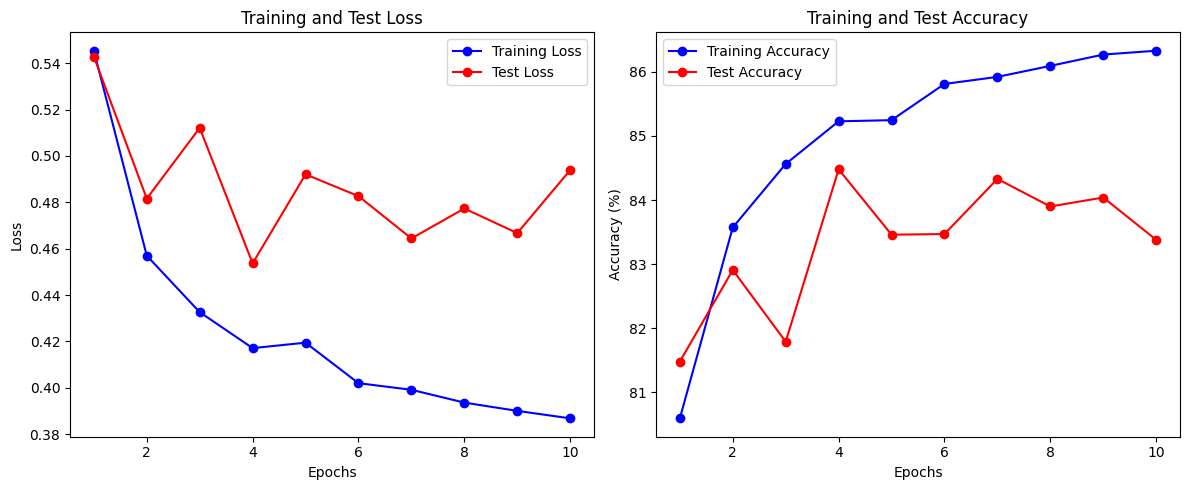

In [ ]:
plot_training_results(train_losses, train_accuracies, test_losses, test_accuracies)

## 04-012 드롭아웃을 포함한 FashionMNIST 모델 클래스 구현

In [ ]:
# 신경망 모델 정의 (Dropout 포함)
class FashionMNISTDropoutModel(nn.Module):
    def __init__(self):
        super(FashionMNISTDropoutModel, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.1)  # 10%의 드롭아웃 적용

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)  # 첫 번째 은닉층 뒤에 드롭아웃 적용
        x = self.fc2(x)  # 출력층에는 드롭아웃을 사용하지 않음
        return x

# 모델 인스턴스화
model = FashionMNISTDropoutModel().to(device)
summary(model, (10, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
FashionMNISTDropoutModel                 [10, 10]                  --
├─Flatten: 1-1                           [10, 784]                 --
├─Linear: 1-2                            [10, 128]                 100,480
├─Dropout: 1-3                           [10, 128]                 --
├─Linear: 1-4                            [10, 10]                  1,290
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
Total mult-adds (M): 1.02
Input size (MB): 0.03
Forward/backward pass size (MB): 0.01
Params size (MB): 0.41
Estimated Total Size (MB): 0.45

## 04-013 손실 함수 및 옵티마이저 설정과 학습 수행

In [ ]:
# 손실 함수와 옵티마이저 설정
criterion = nn.CrossEntropyLoss()  # 다중 클래스 분류를 위한 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam 옵티마이저

train_losses, train_accuracies, test_losses, test_accuracies = train_and_evaluate(
    model, train_loader, test_loader, criterion, optimizer, num_epochs=10, device=device
)

Epoch [1]
Train Loss: 0.5968, Train Accuracy: 78.72%
Test Loss: 0.5244, Test Accuracy: 82.12%
Epoch [2]
Train Loss: 0.5286, Train Accuracy: 81.18%
Test Loss: 0.5641, Test Accuracy: 81.50%
Epoch [3]
Train Loss: 0.5086, Train Accuracy: 82.07%
Test Loss: 0.5404, Test Accuracy: 82.00%
Epoch [4]
Train Loss: 0.4972, Train Accuracy: 82.50%
Test Loss: 0.4689, Test Accuracy: 83.03%
Epoch [5]
Train Loss: 0.4834, Train Accuracy: 82.95%
Test Loss: 0.4900, Test Accuracy: 83.53%
Epoch [6]
Train Loss: 0.4711, Train Accuracy: 83.50%
Test Loss: 0.5309, Test Accuracy: 82.65%
Epoch [7]
Train Loss: 0.4771, Train Accuracy: 83.43%
Test Loss: 0.5667, Test Accuracy: 81.62%
Epoch [8]
Train Loss: 0.4698, Train Accuracy: 83.55%
Test Loss: 0.5018, Test Accuracy: 82.35%
Epoch [9]
Train Loss: 0.4604, Train Accuracy: 83.87%
Test Loss: 0.5097, Test Accuracy: 81.16%
Epoch [10]
Train Loss: 0.4601, Train Accuracy: 84.05%
Test Loss: 0.4988, Test Accuracy: 84.26%


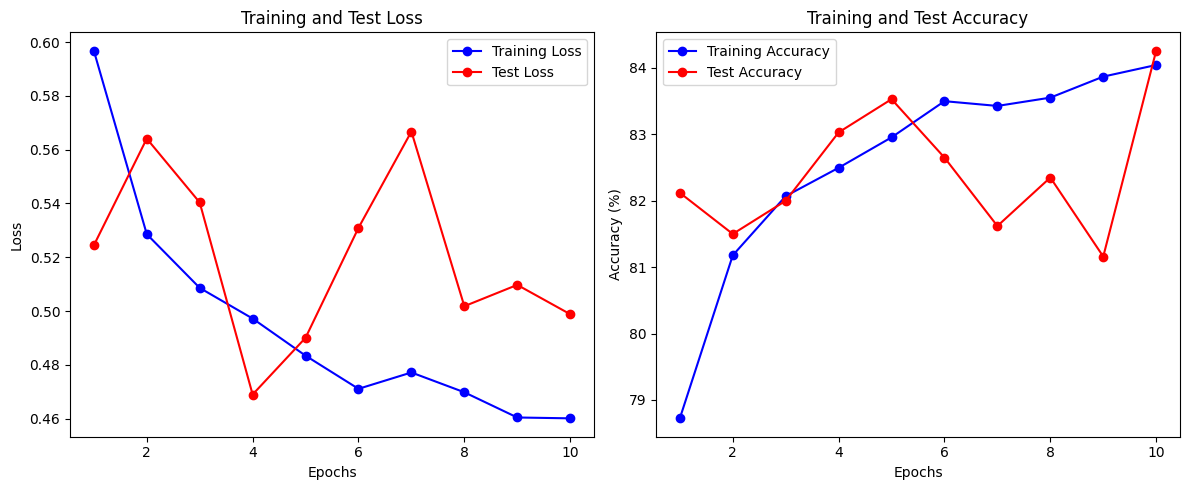

In [ ]:
plot_training_results(train_losses, train_accuracies, test_losses, test_accuracies)

## 04-014 Batch Normalization 및 Dropout 포함 모델 정의

In [ ]:
# 신경망 모델 정의 (Batch Normalization 및 Dropout 포함)
class FashionMNISTBNModel(nn.Module):
    def __init__(self):
        super(FashionMNISTBNModel, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.bn1 = nn.BatchNorm1d(128)  # 첫 번째 배치 정규화 레이어
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.1)  # 10%의 드롭아웃 적용

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.bn1(self.fc1(x)))  # 첫 번째 배치 정규화 + ReLU
        x = self.dropout(x)  # 드롭아웃 적용
        x = self.fc2(x)  # 출력층에는 배치 정규화 및 드롭아웃을 사용하지 않음
        return x

# 모델 인스턴스화
model = FashionMNISTBNModel().to(device)
summary(model, (10, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
FashionMNISTBNModel                      [10, 10]                  --
├─Flatten: 1-1                           [10, 784]                 --
├─Linear: 1-2                            [10, 128]                 100,480
├─BatchNorm1d: 1-3                       [10, 128]                 256
├─Dropout: 1-4                           [10, 128]                 --
├─Linear: 1-5                            [10, 10]                  1,290
Total params: 102,026
Trainable params: 102,026
Non-trainable params: 0
Total mult-adds (M): 1.02
Input size (MB): 0.03
Forward/backward pass size (MB): 0.02
Params size (MB): 0.41
Estimated Total Size (MB): 0.46

## 04-015 손실 함수 및 옵티마이저 설정과 학습 수행

In [ ]:
# 손실 함수와 옵티마이저 설정
criterion = nn.CrossEntropyLoss()  # 다중 클래스 분류를 위한 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam 옵티마이저

train_losses, train_accuracies, test_losses, test_accuracies = train_and_evaluate(
    model, train_loader, test_loader, criterion, optimizer, num_epochs=10, device=device
)

Epoch [1]
Train Loss: 0.4756, Train Accuracy: 82.76%
Test Loss: 0.3975, Test Accuracy: 85.78%
Epoch [2]
Train Loss: 0.3734, Train Accuracy: 86.41%
Test Loss: 0.3932, Test Accuracy: 85.59%
Epoch [3]
Train Loss: 0.3433, Train Accuracy: 87.47%
Test Loss: 0.3577, Test Accuracy: 87.13%
Epoch [4]
Train Loss: 0.3235, Train Accuracy: 88.23%
Test Loss: 0.3682, Test Accuracy: 87.22%
Epoch [5]
Train Loss: 0.3072, Train Accuracy: 88.56%
Test Loss: 0.3455, Test Accuracy: 87.74%
Epoch [6]
Train Loss: 0.2930, Train Accuracy: 89.11%
Test Loss: 0.3485, Test Accuracy: 87.41%
Epoch [7]
Train Loss: 0.2819, Train Accuracy: 89.57%
Test Loss: 0.3328, Test Accuracy: 88.20%
Epoch [8]
Train Loss: 0.2695, Train Accuracy: 90.03%
Test Loss: 0.3366, Test Accuracy: 88.40%
Epoch [9]
Train Loss: 0.2649, Train Accuracy: 90.16%
Test Loss: 0.3363, Test Accuracy: 88.44%
Epoch [10]
Train Loss: 0.2561, Train Accuracy: 90.48%
Test Loss: 0.3497, Test Accuracy: 88.17%


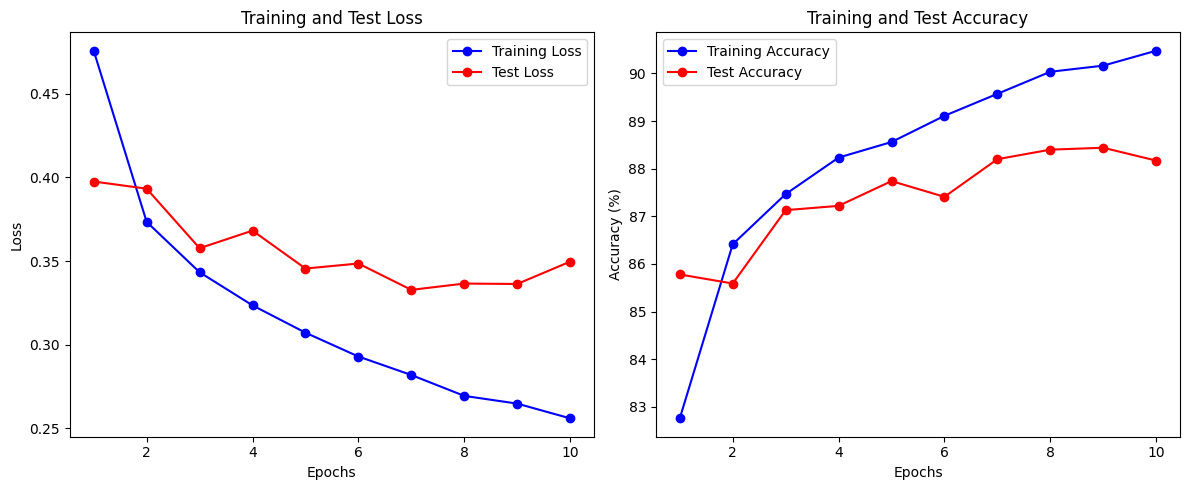

In [ ]:
plot_training_results(train_losses, train_accuracies, test_losses, test_accuracies)

## 04-016 L2 정칙화를 위한 옵티마이저 설정

In [ ]:
# L2 정칙화를 위한 옵티마이저 설정 (weight_decay가 L2 정칙화)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=0.001)

---

## 연습문제-04-001 Sequential 방식으로 2차원 더미 데이터를 이용한 다중 분류 모델 설계

In [ ]:
# nn.Sequential을 사용하여 정의
# 1. 첫 번째 레이어는 nn.Linear(2, 32)로 입력 차원이 2이고 출력 차원이 32인 완전연결층을 사용.
# 2. nn.ReLU()로 활성화 함수인 ReLU를 추가.
# 3. 두 번째 레이어는 nn.Linear(32, 16)으로 입력 차원이 32, 출력 차원이 16인 완전연결층을 추가.
# 4. 다시 nn.ReLU()로 활성화 함수 추가.
# 5. 마지막 레이어는 nn.Linear(16, 1)으로 입력 차원이 16, 출력 차원이 1인 완전연결층을 추가.
# 6. nn.sigmoid()으로 출력을 확률 분포로 변환.
# 최종 모델은 이진 분류 문제를 해결할 수 있는 모델.


## 연습문제-04-002 Module 방식으로 2차원 더미 데이터를 이용한 회귀 모델 설계

In [ ]:
# nn.Module을 상속받아 정의
# 1. __init__ 메서드에서 세 개의 레이어(layer1, layer2, layer3)를 정의.
#    각 레이어는 nn.Linear를 사용하여 정의되며, 첫 번째 레이어는 입력이 2차원, 출력이 64차원.
# 2. 두 번째 레이어는 입력이 64차원, 출력이 32차원.
# 3. 세 번째 레이어는 입력이 32차원, 출력이 1차원으로 회귀 문제에 맞게 설정.
# 4. forward 메서드에서 입력 데이터가 layer1 -> ReLU -> layer2 -> ReLU -> layer3 순으로 통과.
#    마지막 출력은 회귀 문제이므로 활성화 함수 없이 그대로 반환.

class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()

    def forward(self, x):


model = DNN()
model

DNN(
  (layer1): Linear(in_features=2, out_features=64, bias=True)
  (layer2): Linear(in_features=64, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=1, bias=True)
)

---